In [1]:
import pandas as pd
from sklearn.decomposition import IncrementalPCA

### PCA with selected features

In [ ]:
years = ['2015', '2016', '2017', '2018', '2019', '2020']
generate_path = './../../generated/'
file_prefix_r = 'quotes-'
file_suffix_r = '_with_language_feats.csv'
selected_feats = [',_per_sentence', 'sign_per_token', 'approx_word_count', 'token_count', 'adj_per_word', 'verb_per_word', 'base_ratio', 'pres_ratio', 'past_ratio', 'pronoun_per_word', 'sentiment']

ipca = IncrementalPCA(n_components = len(selected_feats), batch_size = 40000)

for year in years:
    print("Year: " + str(year))
    # read the file from year and filer away features that are not selected
    file_name_r = file_prefix_r + year + file_suffix_r
    df_quotes_chunks = pd.read_csv(generate_path + file_name_r, chunksize = 40000, low_memory = False)
    for i, df_chunk in enumerate(df_quotes_chunks):
        # remove header duplicates
        chunk_clean = df_chunk[selected_feats][df_chunk[',_per_sentence'] != ',_per_sentence']

        ipca.partial_fit(chunk_clean.to_numpy())
        if i % 50 == 0:
            print("Chunk: " + str(i))


In [66]:
ipca.explained_variance_ratio_

array([9.96683848e-01, 1.50687011e-03, 7.04334067e-04, 6.25682351e-04,
       4.06710608e-04, 4.10330836e-05, 1.66893819e-05, 6.26032996e-06,
       4.11063836e-06, 3.31934678e-06, 1.14158829e-06])

In [72]:
pca_vec = ipca.components_[:2]

### PCA with all features

In [ ]:
years = ['2015'] #['2015', '2016', '2017', '2018', '2019', '2020']
file_prefix_r = 'quotes-'
file_suffix_r = '_with_language_feats.csv'
generate_path = './../../generated/'

ipca2 = IncrementalPCA(batch_size = 40000)

for year in years:
    print("Year: " + str(year))
    # read the file from year
    file_name_r = file_prefix_r + year + file_suffix_r
    df_quotes_chunks = pd.read_csv(generate_path + file_name_r, chunksize = 40000, low_memory = False)
    
    for i, df_chunk in enumerate(df_quotes_chunks):
        # remove header duplicates and drop non-language features columns
        chunk_clean = df_chunk.drop(columns = ['Unnamed: 0', 'quoteID', 'quotation', 'speaker', 'prob', 'qid'])[df_chunk[',_per_sentence'] != ',_per_sentence']
        
        ipca2.partial_fit(chunk_clean.to_numpy())

        if i % 50 == 0:
            print("Chunk: " + str(i))


In [37]:
ipca2.explained_variance_

array([8.77082522e+02, 1.40877005e+00, 1.07727608e+00, 7.13629627e-01,
       6.97089554e-01, 6.18924523e-01, 5.59511528e-01, 3.83780795e-01,
       3.49980869e-01, 8.32235199e-02, 7.73777916e-02, 6.24553270e-02,
       3.77195292e-02, 3.60558753e-02, 2.07679802e-02, 1.78119654e-02,
       1.64074580e-02, 1.41675010e-02, 1.20637233e-02, 4.26195419e-03,
       2.23949346e-03, 1.77061585e-03, 8.50784858e-04, 1.06642148e-26])

### Plot datapoints after dim reduction

In [68]:
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
%matplotlib inline

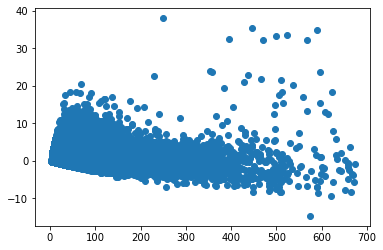

Chunk: 0
die
die
die
die
die
die
die


In [75]:
years = ['2015'] #['2015', '2016', '2017', '2018', '2019', '2020']
file_prefix_r = 'quotes-'
file_suffix_r = '_with_language_feats.csv'
generate_path = './../../generated/'
selected_feats = [',_per_sentence', 'sign_per_token', 'approx_word_count', 'token_count', 'adj_per_word', 'verb_per_word', 'base_ratio', 'pres_ratio', 'past_ratio', 'pronoun_per_word', 'sentiment']

for year in years:
    # read the file from year
    file_name_r = file_prefix_r + year + file_suffix_r
    df_quotes_chunks = pd.read_csv(generate_path + file_name_r, chunksize = 1000000, low_memory = False)

    # plot the data points of the first chunk
    for i, df_chunk in enumerate(df_quotes_chunks):
        if i == 0:
            # remove duplicate headers, filter on features and cast to type float32
            chunk_clean = df_chunk[selected_feats][df_chunk[',_per_sentence'] != ',_per_sentence'].astype('float32')
            v = chunk_clean.to_numpy() @ pca_vec.T
            scatter(v[:,0], v[:,1])
            plt.show()
            if i % 10 == 0:
                print("Chunk: " + str(i))
        else:
            print("die")